In [196]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re
import numpy as np

from csv import writer

In [197]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)' #measured just on nipples
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"

upper_chest='Chest Girth (Chest Circumference at Scye) (mm)' #measured above nipple
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"
malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'

meausred_weight='Weight (kg)'

thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'

rectangle='Rectangle'
triangle='Triangle'
inverted_triangle='Inverted Triangle'
measured_shape_val="Measured weight with shape"
measured_without_shape_val='Measured Weight without shape'
reported_shape_val="Reported Weight with shape"
reported_without_shape_val='Reported Weight without shape'



demographic=[age, height, weight, shoe_size,'shape','ratio',inverted_triangle,rectangle,triangle,meausred_weight]

measurement=[waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,upper_chest,malleolus_height_inner,malleolus_height_outer]
# italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy,pants_size]
# italy_measurements=[subject_number,waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,italy_upper_chest,meausred_weight]
additional=[subject_number,pants_size]

#M_data=pd.read_csv(measurement_path,skipinitialspace=True)

In [198]:
measured_shape=pd.read_csv('./male_pred_with_shape(measured).csv',skipinitialspace=True,usecols=measurement)
measured_without_shape=pd.read_csv('./male_pred_without_shape(measured).csv',skipinitialspace=True,usecols=measurement)
reported_shape=pd.read_csv('./male_pred_with_shape(reported).csv',skipinitialspace=True,usecols=measurement)
reported_without_shape=pd.read_csv('./male_pred_without_shape(reported).csv',skipinitialspace=True,usecols=measurement)
target=pd.read_csv('./male_target_with_shape(measured).csv',skipinitialspace=True,usecols=measurement)
X_test=pd.read_csv('./X_test.csv',skipinitialspace=True,usecols=demographic)
y_test=pd.read_csv('./y_test.csv',skipinitialspace=True,usecols=measurement)
y_test=y_test/10

In [199]:
def plot_error_distribution(array,title):
    plt.subplots(figsize=(8,4))
    #Set X-Axis range
    
    plt.title('Model Error Distribution:' + title)
    plt.ylabel('No. of Predictions')
    plt.xlabel('Error (cm)')
    plt.hist(array)
    plt.show()

In [200]:
def plot_box_two(arr_1,arr_2,column_1,column_2):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot([arr_1,arr_2])
    plt.xticks([1, 2], [column_1, column_2], rotation=10)
    plt.show()

In [201]:
def plot_box(arr_1,column_1):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot([arr_1])
    # plt.xticks([1, 2], [column_1], rotation=10)
    plt.show()

In [202]:

# measured_shape = X_test.merge(measured_shape,left_index=True,right_index=True)
# measured_without_shape = X_test.merge(measured_without_shape,left_index=True,right_index=True)
# reported_shape = X_test.merge(reported_shape,left_index=True,right_index=True)
# reported_without_shape = X_test.merge(reported_without_shape,left_index=True,right_index=True)
# target = X_test.merge(y_test,left_index=True,right_index=True)


<AxesSubplot:>

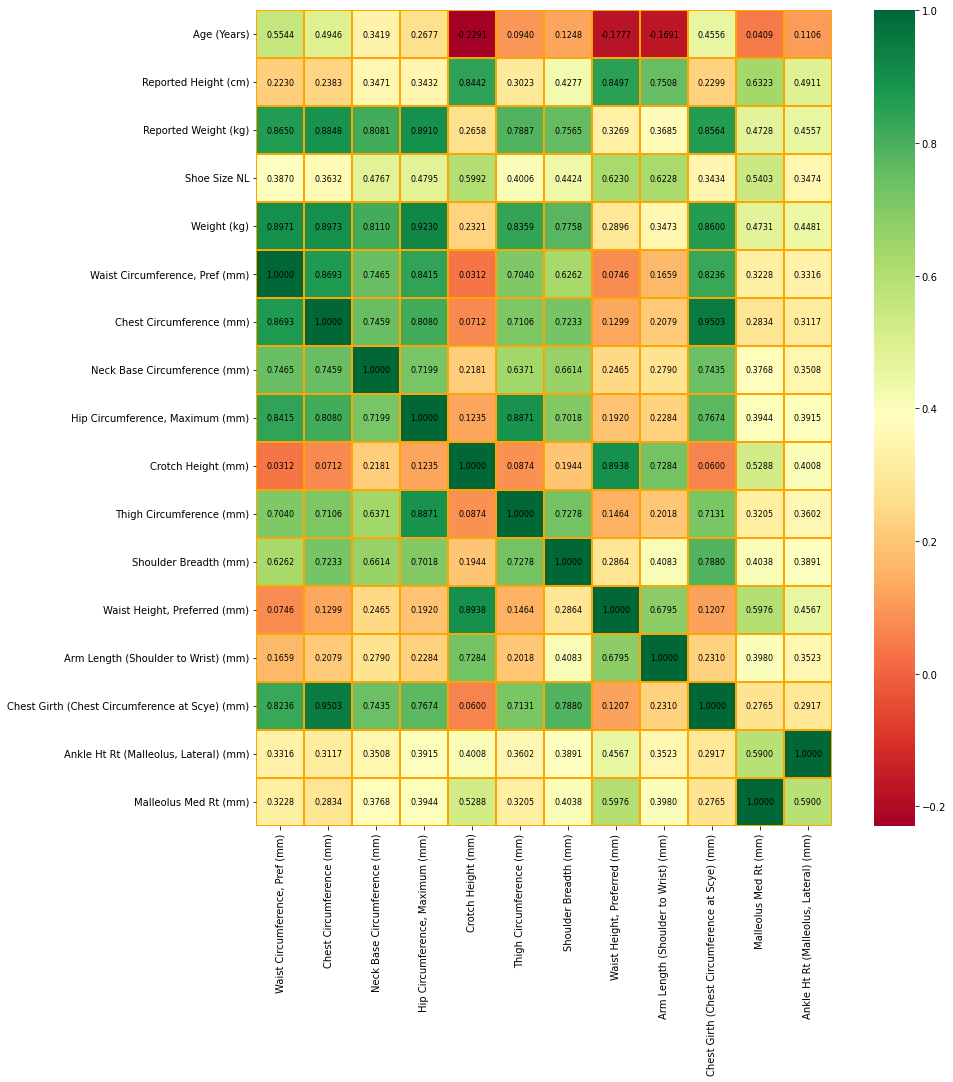

In [203]:
plt.figure(figsize=(15,15))
result=X_test.merge(y_test,left_index=True,right_index=True)
result.drop(['shape','ratio',inverted_triangle,rectangle,triangle],axis=1,inplace=True)

corr=result.corr()
# # corr_measured_shape=corr.drop([height,age,shoe_size],axis=1)
# # print(corr_measured_shape[[weight,meausred_weight]])
sns.heatmap(corr[measurement],annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

In [209]:
measured_shape_ERROR=(y_test-measured_shape).abs()
measured_without_shape_ERROR=(y_test-measured_without_shape).abs()
reported_shape_ERROR=(y_test-reported_shape).abs()
reported_without_shape_ERROR=(y_test-reported_without_shape).abs()

measured_shape_ERROR.to_csv("./result/measured_shape_error.csv",encoding='utf-8',index=False)
measured_without_shape_ERROR.to_csv("./result/measured_without_shape_error.csv",encoding='utf-8',index=False)
reported_shape_ERROR.to_csv("./result/reported_shape_error.csv",encoding='utf-8',index=False)
reported_without_shape_ERROR.to_csv("./result/reported_without_shape_error.csv",encoding='utf-8',index=False)



print(measured_shape_ERROR.median(axis=0))
print(measured_shape_ERROR.max(axis=0))

print(measured_without_shape_ERROR.median(axis=0))
print(measured_without_shape_ERROR.max(axis=0))

print(reported_shape_ERROR.median(axis=0))
print(reported_shape_ERROR.max(axis=0))

print(reported_without_shape_ERROR.median(axis=0))
print(reported_without_shape_ERROR.max(axis=0))

Waist Circumference, Pref (mm)                    1.978540
Chest Circumference (mm)                          2.360556
Neck Base Circumference (mm)                      1.428738
Hip Circumference, Maximum (mm)                   1.744113
Crotch Height (mm)                                2.215198
Thigh Circumference (mm)                          1.961853
Shoulder Breadth (mm)                             1.192097
Waist Height, Preferred (mm)                      2.600146
Arm Length (Shoulder to Wrist) (mm)               1.846606
Chest Girth (Chest Circumference at Scye) (mm)    2.399954
Ankle Ht Rt (Malleolus, Lateral) (mm)             0.353517
Malleolus Med Rt (mm)                             0.433226
dtype: float64
Waist Circumference, Pref (mm)                    15.212244
Chest Circumference (mm)                          12.784015
Neck Base Circumference (mm)                       6.198376
Hip Circumference, Maximum (mm)                    8.170081
Crotch Height (mm)                   

In [205]:



with open('./result/measured_shape_error.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(measured_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(measured_shape_ERROR.max(axis=0))


with open('./result/measured_without_shape_error.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(measured_without_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(measured_without_shape_ERROR.max(axis=0))

with open('./result/reported_shape_ERROR.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(reported_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(reported_shape_ERROR.max(axis=0))


with open('./result/reported_without_shape_error.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(reported_without_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(reported_without_shape_ERROR.max(axis=0))


In [206]:
dict={measured_shape_val:measured_shape,measured_without_shape_val:measured_without_shape,reported_shape_val:reported_shape,reported_without_shape_val:reported_without_shape}

Upper & lower quartiles distribution - whats the error range of 70%, 80%, 90% percentiles 

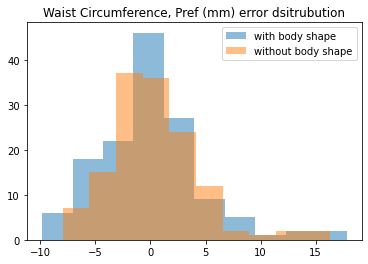

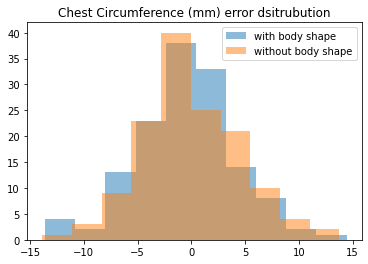

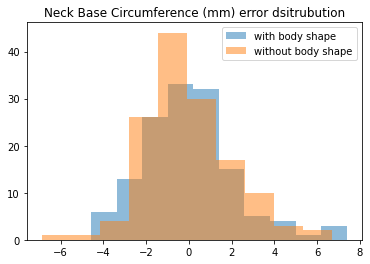

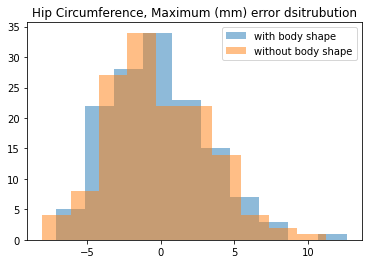

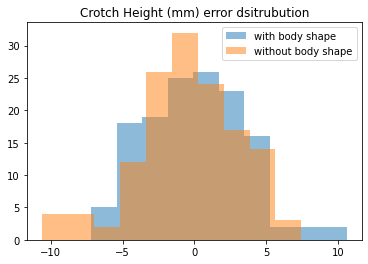

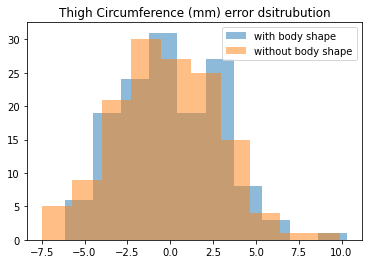

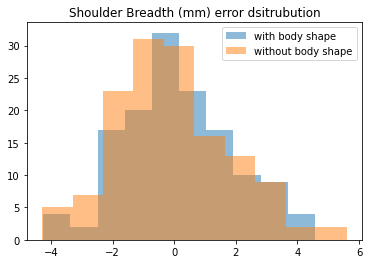

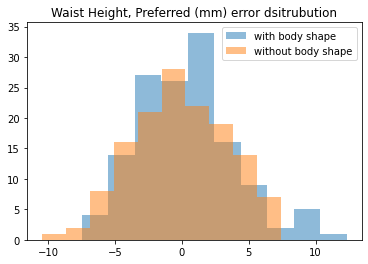

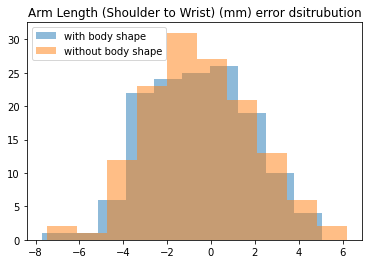

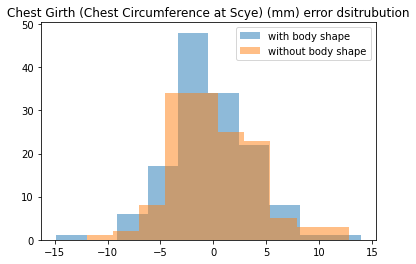

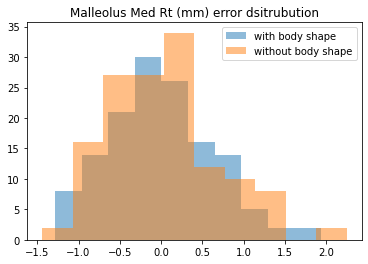

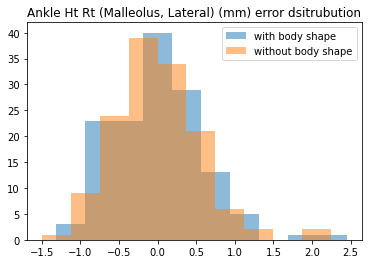

In [207]:
for feature in measurement:
    with_shape_target=y_test[feature].to_numpy()
    with_shape_pred=reported_shape[feature].to_numpy()
    with_shape_error=(np.subtract(with_shape_target,with_shape_pred))

    without_shape_target=y_test[feature].to_numpy()
    without_shape_pred=reported_without_shape[feature].to_numpy()
    without_shape_error=(np.subtract(without_shape_target,without_shape_pred))
    plt.hist(with_shape_error, alpha=0.5)
    plt.title(feature+" error dsitrubution")
    plt.hist(without_shape_error, alpha=0.5)
    plt.legend(['with body shape','without body shape'])
    plt.show()


# plt.hist(chest_error, alpha=0.5)

# plt.hist(chest_error_u, alpha=0.5)
# plt.legend(['with body shape','without body shape'])

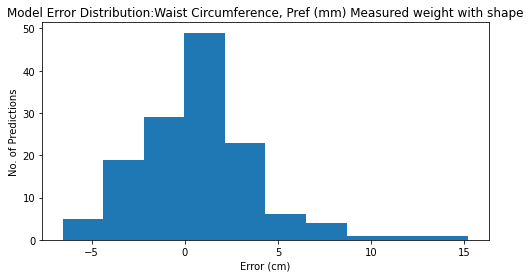

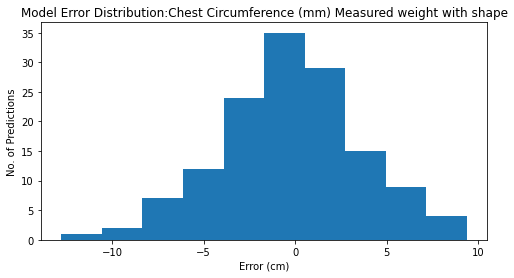

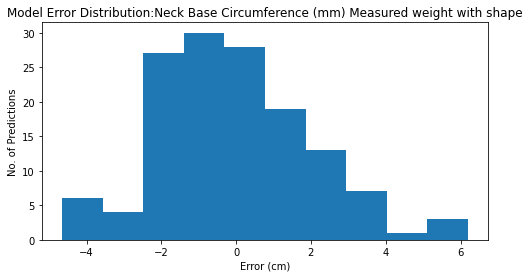

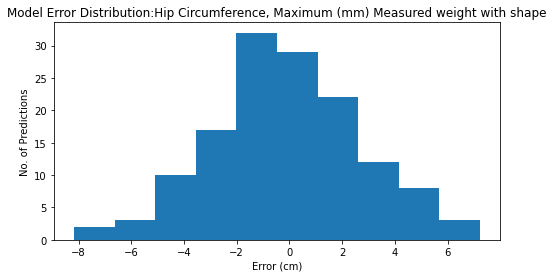

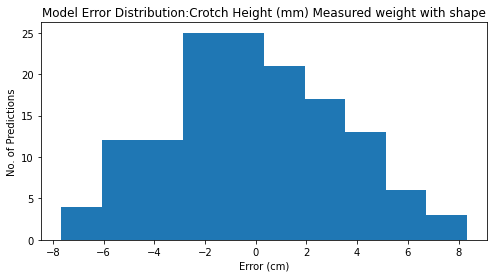

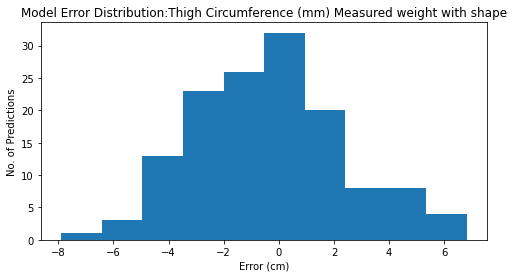

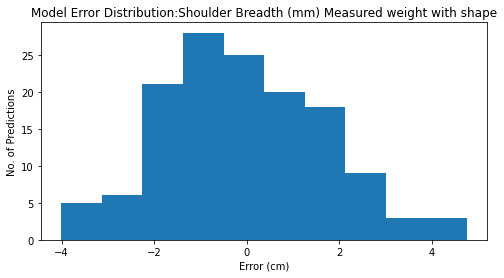

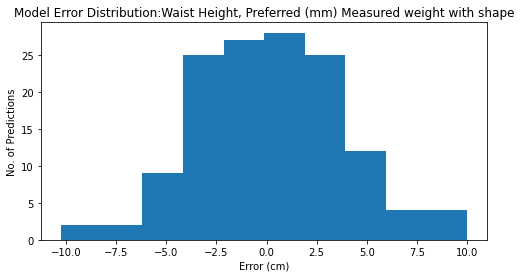

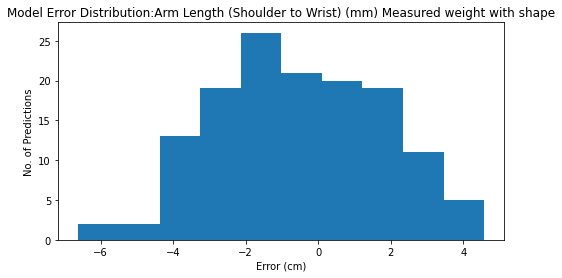

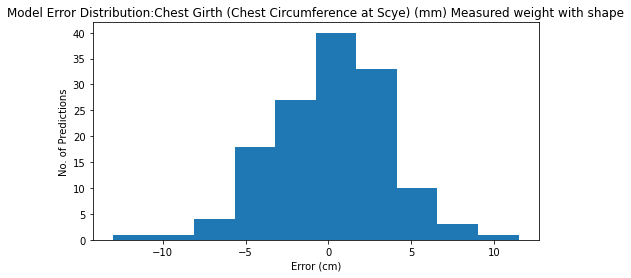

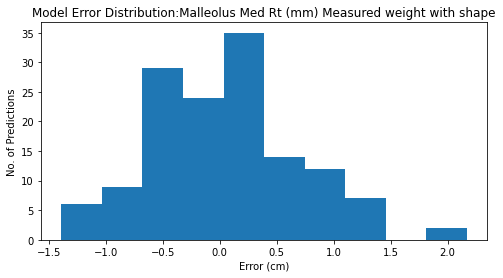

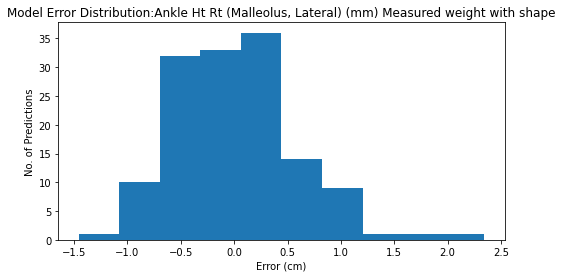

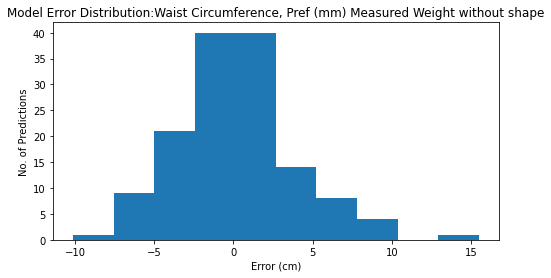

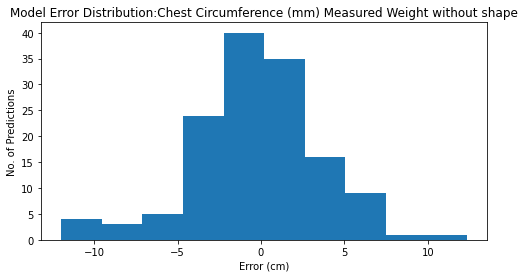

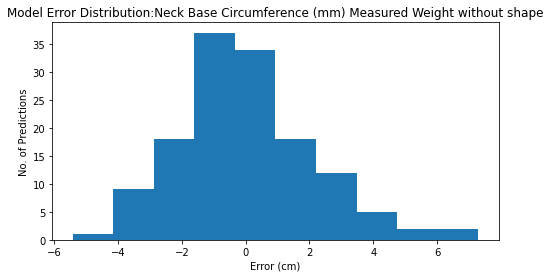

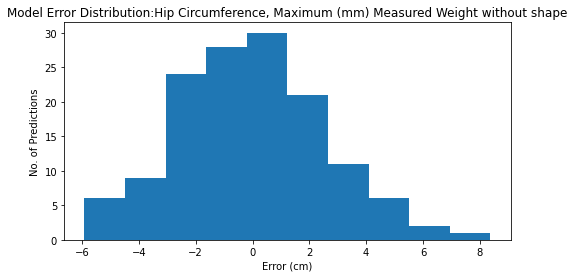

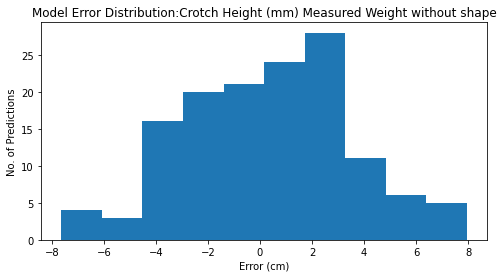

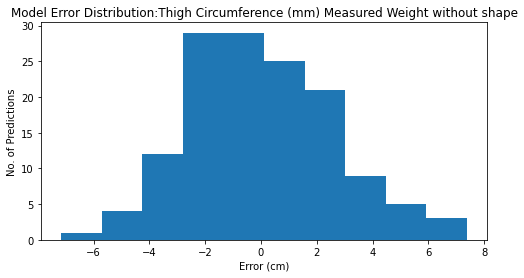

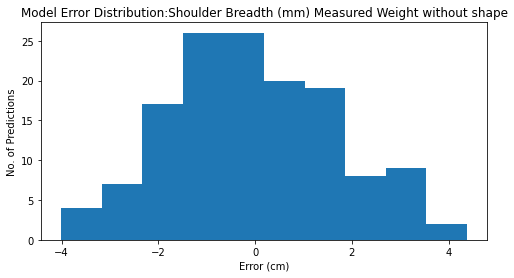

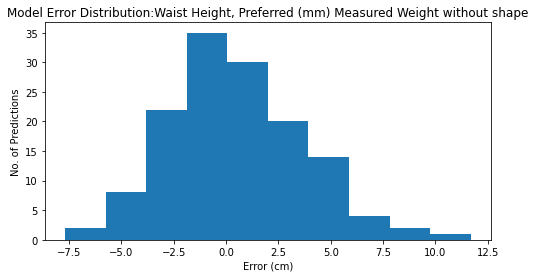

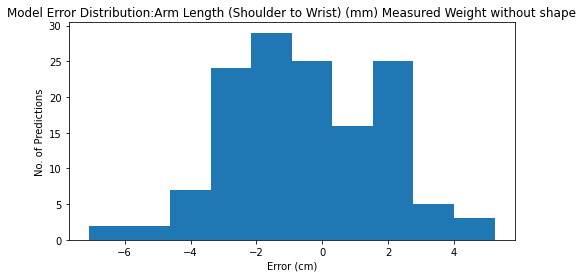

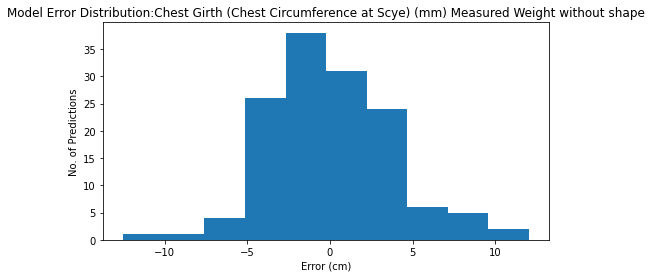

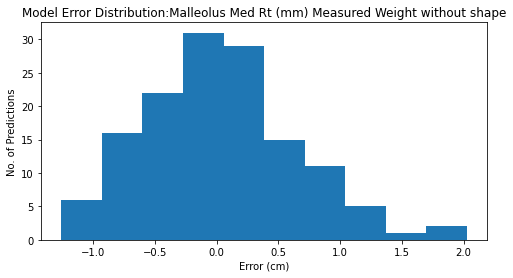

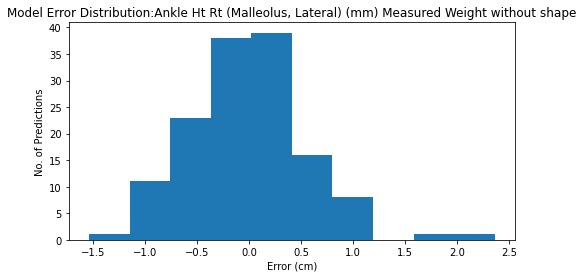

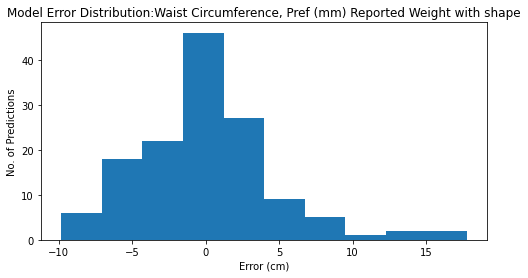

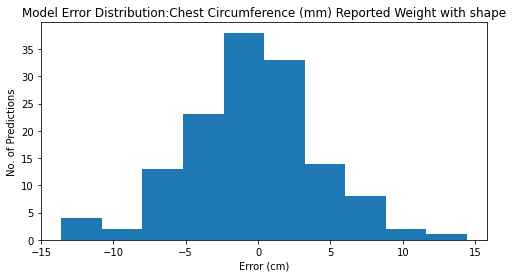

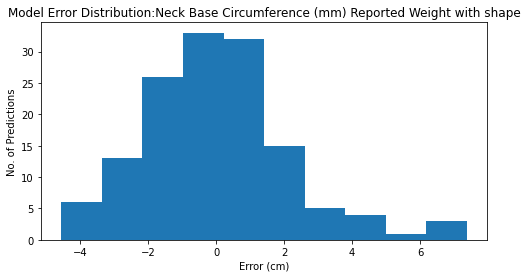

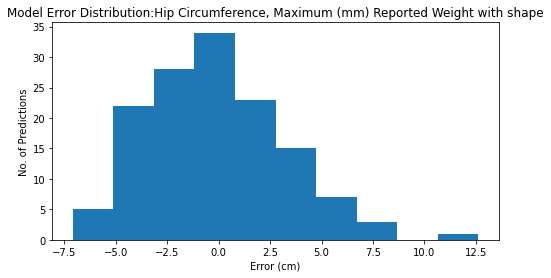

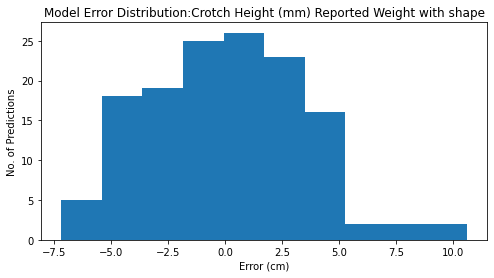

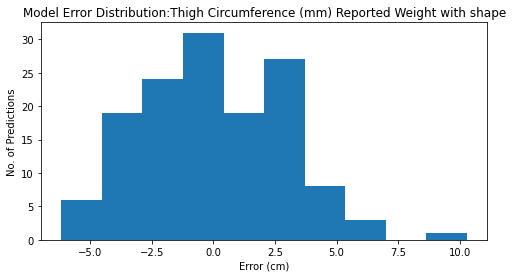

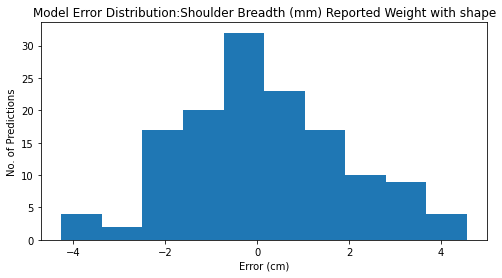

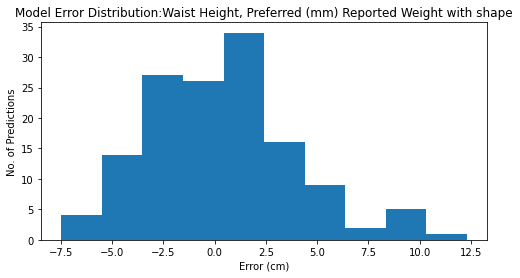

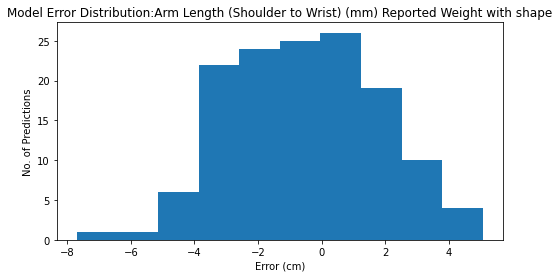

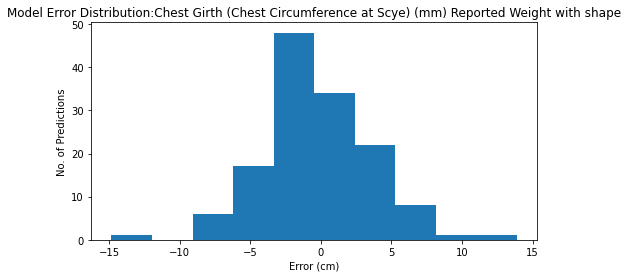

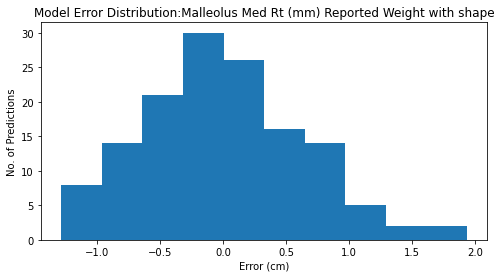

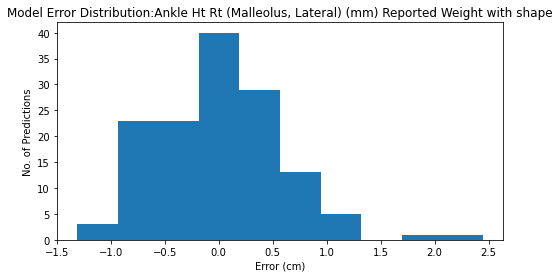

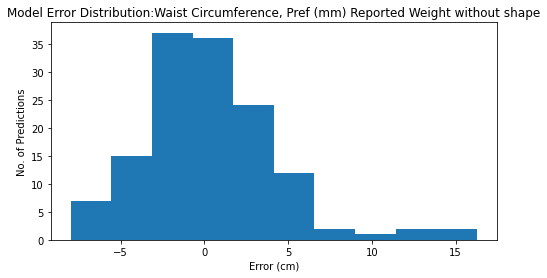

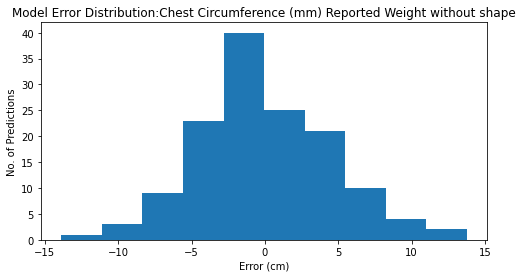

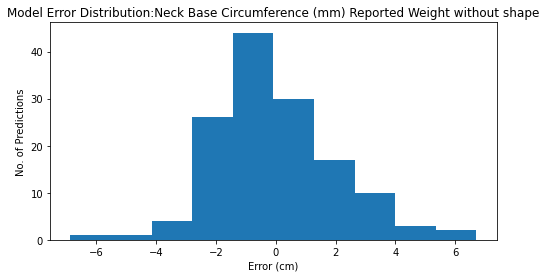

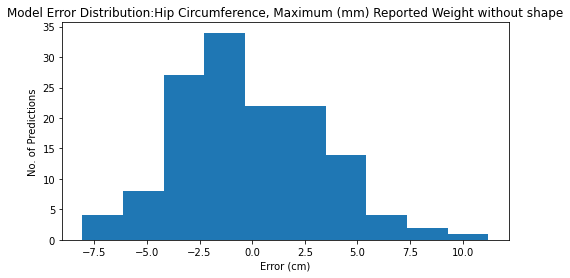

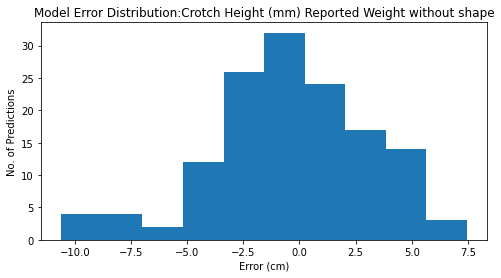

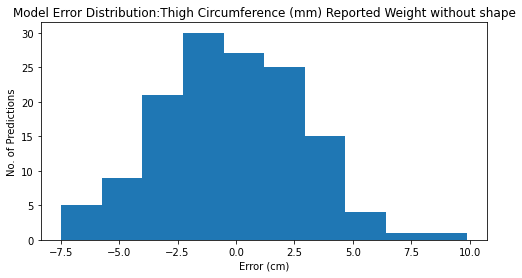

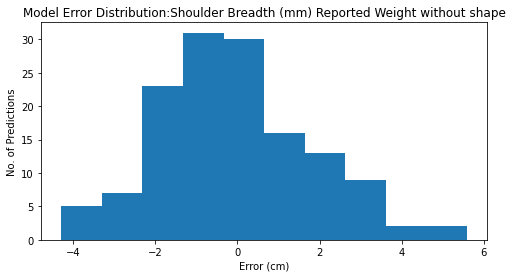

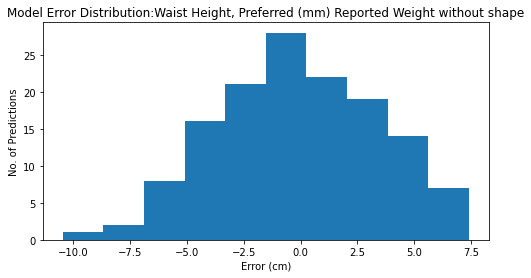

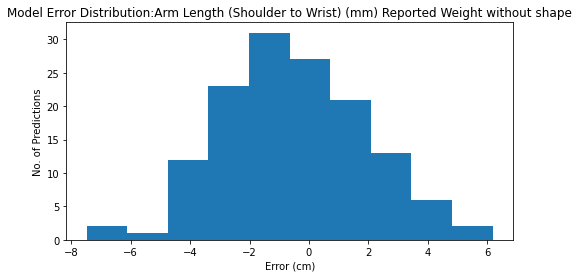

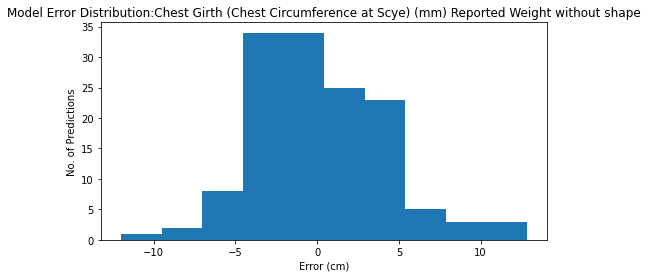

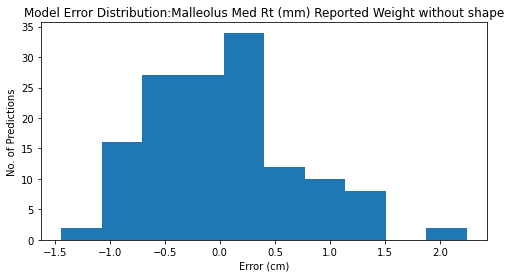

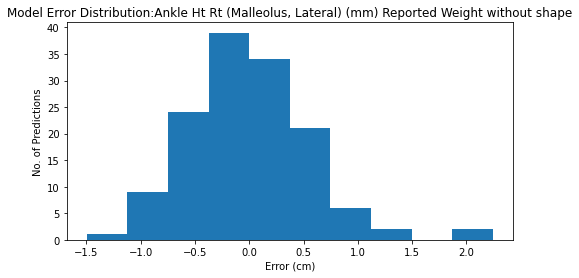

In [208]:
for x in dict:
    pred_df=dict[x]
    target_df=y_test
    for feature in measurement: 
        target=target_df[feature].to_numpy()
        pred=pred_df[feature].to_numpy()
        error=(np.subtract(target,pred))
        plot_error_distribution(error,feature+ " "+ x)
    

In [213]:
reported_shape.sort_values(by=measurement)
reported_without_shape.sort_values(by=measurement)


,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
9,75.229767,88.446045,46.421466,93.626123,84.661090,53.825983,45.264859,106.299707,64.226624,92.170398,7.247348,8.684219
19,75.514807,88.786896,45.485989,91.116553,75.385168,53.123431,43.703156,95.908844,60.449731,91.428168,6.592612,7.499940
136,75.768677,90.298663,46.170044,91.540283,74.918903,54.024683,44.206683,95.014832,60.027893,93.092810,6.586298,7.426018
126,76.210303,88.962915,46.499399,94.469861,85.281342,54.077020,45.534241,106.856665,64.612653,92.577600,7.282810,8.799382
14,76.673779,89.742780,45.742371,91.313074,74.796912,53.481897,43.657428,95.275397,60.133533,91.907727,6.555880,7.470954
...,...,...,...,...,...,...,...,...,...,...,...,...
104,102.873254,123.174390,53.864441,114.460791,85.906726,64.040302,51.903857,109.080017,64.623932,120.595654,7.115218,9.413053
132,102.908838,109.462830,51.378473,111.239624,86.014587,63.849335,49.313519,110.034082,67.292511,108.093347,7.570149,9.402922
105,103.683984,111.735632,52.258191,109.976599,77.737146,65.914539,50.326794,101.020386,63.647864,112.647009,7.309344,8.854274
32,105.462756,111.542273,51.632599,112.077637,85.067194,64.889636,49.829260,109.404980,66.965967,110.714404,7.516805,9.420789


In [216]:
for feauture in measurement:
    print(feauture)
    print("25 percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),25))
    print("50 percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),50))
    print("75 percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),75))
    print("70th percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),70))
    print("80th percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),80))
    print("90th percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),90))
    print("-----------------------------")


Waist Circumference, Pref (mm)
25 percentile of reported shape:  6.780159378051758
50 percentile of reported shape:  6.994316482543946
75 percentile of reported shape:  7.205955123901368
70th percentile of reported shape:  7.18226089477539
80th percentile of reported shape:  7.269781494140625
90th percentile of reported shape:  7.399643630981445
-----------------------------
Chest Circumference (mm)
25 percentile of reported shape:  6.780159378051758
50 percentile of reported shape:  6.994316482543946
75 percentile of reported shape:  7.205955123901368
70th percentile of reported shape:  7.18226089477539
80th percentile of reported shape:  7.269781494140625
90th percentile of reported shape:  7.399643630981445
-----------------------------
Neck Base Circumference (mm)
25 percentile of reported shape:  6.780159378051758
50 percentile of reported shape:  6.994316482543946
75 percentile of reported shape:  7.205955123901368
70th percentile of reported shape:  7.18226089477539
80th percent

In [217]:
for feauture in measurement:
    print(feauture)
    print("25 percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),25))
    print("50 percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),50))
    print("75 percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),75))
    print("70th percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),70))
    print("80th percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),80))
    print("90th percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),90))
    print("-----------------------------")


Waist Circumference, Pref (mm)
25 percentile of reported shape:  6.838864707946778
50 percentile of reported shape:  7.025785827636719
75 percentile of reported shape:  7.222837448120117
70th percentile of reported shape:  7.1893768310546875
80th percentile of reported shape:  7.25870620727539
90th percentile of reported shape:  7.347748107910156
-----------------------------
Chest Circumference (mm)
25 percentile of reported shape:  6.838864707946778
50 percentile of reported shape:  7.025785827636719
75 percentile of reported shape:  7.222837448120117
70th percentile of reported shape:  7.1893768310546875
80th percentile of reported shape:  7.25870620727539
90th percentile of reported shape:  7.347748107910156
-----------------------------
Neck Base Circumference (mm)
25 percentile of reported shape:  6.838864707946778
50 percentile of reported shape:  7.025785827636719
75 percentile of reported shape:  7.222837448120117
70th percentile of reported shape:  7.1893768310546875
80th per